In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow



#just collecting all the requred as a one function
def Cartoonify(image_path):
  original = cv2.imread(image_path)
  print("original image")
  cv2_imshow(original)
  smoothed_original = cv2.bilateralFilter(original, 9, 75, 75)
  print("smoothed original image after applyng bilateral filter")
  cv2_imshow(smoothed_original)
  gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
  print("greys scale image")
  cv2_imshow(gray)
  print("after applying median filter ")
  print("smoothed grey ")
  smoothed_gray = cv2.medianBlur(gray, 7)
  cv2_imshow(smoothed_gray)
  print("after applying Laplacian filter ")
  print("borders map")
  ddepth = cv2.CV_8U
  lap_img = cv2.Laplacian(src=smoothed_gray, ddepth=ddepth, ksize=5)
  cv2_imshow(lap_img)
  print("after applyng threshold = 125 ")
  print("now we have a strong edge map ")
  ret, thresh = cv2.threshold(lap_img, thresh=125, maxval=255, type=cv2.THRESH_BINARY_INV)
  after_thresh = cv2.bilateralFilter(thresh, 9, 75, 75)
  cv2_imshow(after_thresh)
  
  after_thresh_rgb=np.zeros(shape=smoothed_original.shape,dtype='uint8')
#transfering from grey scale to RGB just BY Copying the grey channel 3 times
  after_thresh_rgb[:,:,0]=after_thresh
  after_thresh_rgb[:,:,1]=after_thresh
  after_thresh_rgb[:,:,2]=after_thresh
  print("the final cartoon image")
  print("after applying bitwise and between the strong edge map and smoothed original image")
  
  cartoon_image=np.bitwise_and(smoothed_original,after_thresh_rgb)

  cv2_imshow(cartoon_image)

original image


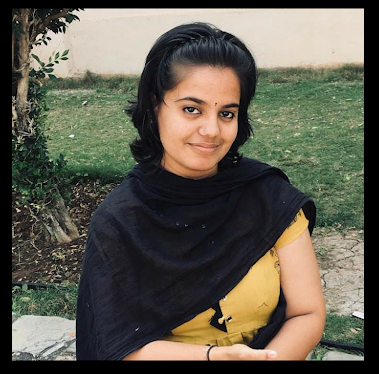

smoothed original image after applyng bilateral filter


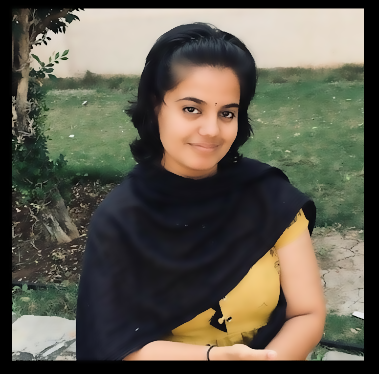

greys scale image


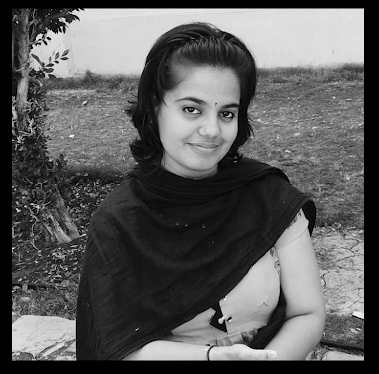

after applying median filter 
smoothed grey 


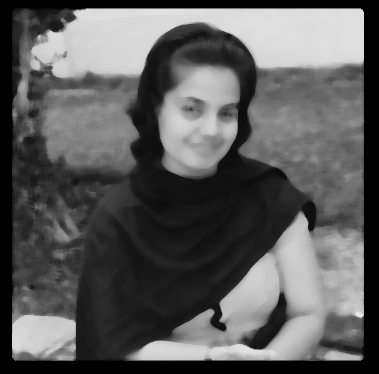

after applying Laplacian filter 
borders map


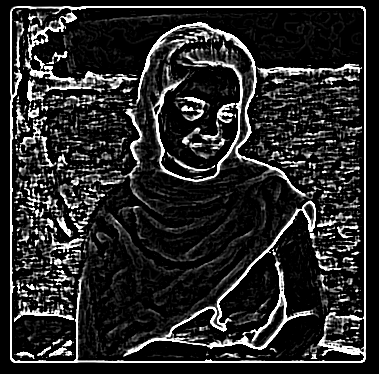

after applyng threshold = 125 
now we have a strong edge map 


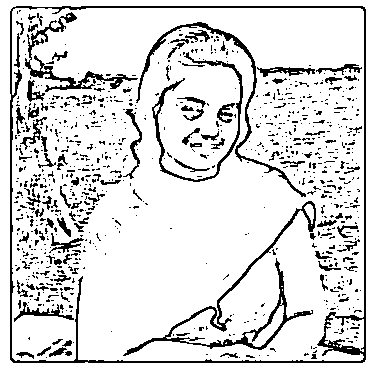

the final cartoon image
after applying bitwise and between the strong edge map and smoothed original image


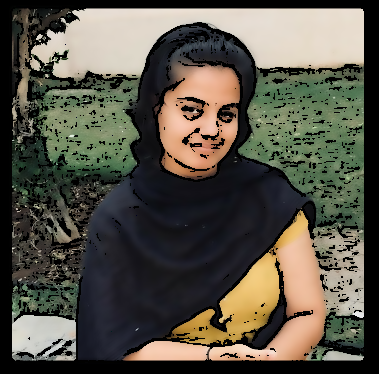

In [26]:
Cartoonify("/content/drive/My Drive/prathyu.png")